## Configuration

Specify the path to your CSV file and whether it's a full or minimal export.

In [1]:
# Configuration Parameters
CSV_FILE_PATH = r"results_20251123_112038\all_games_full.csv"  # Update this path
CSV_TYPE = "full"  # Options: "full" or "minimal"
INCLUDE_OT_GAMES = False  # Set to False to exclude overtime games

## Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

# Set visualization style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (14, 8)

print("Libraries imported successfully")

Libraries imported successfully


## Load and Prepare Data

In [3]:
# Load CSV data
df = pd.read_csv(CSV_FILE_PATH, sep=';')

print(f"Loaded {len(df)} rows from {CSV_FILE_PATH}")
print(f"\nColumns available: {list(df.columns)}")
print(f"\nNumber of unique games: {df['game_id'].nunique()}")
print(f"\nFirst few rows:")
df.head()

Loaded 253589 rows from results_20251123_112038\all_games_full.csv

Columns available: ['round_number', 'is_t1_ct', 'is_t1_winner', 'is_ot', 'is_ct_winner', 'outcome_reason_code', 'outcome_ct_wins', 'outcome_bomb_planted', 'outcome_ct_survivors', 'outcome_t_survivors', 'csf', 'csf_key', 'ct_equipment_share_per_player', 't_equipment_share_per_player', 'ct_equipment_per_player', 't_equipment_per_player', 'rng_csf', 'rng_round_outcome', 'rng_bombplant', 'rng_survivors_ct', 'rng_survivors_t', 'rng_equipment_ct', 'rng_equipment_t', 't1_funds', 't1_funds_start', 't1_earned', 't1_rs_eq_value', 't1_fte_eq_value', 't1_re_eq_value', 't1_survivors', 't1_score_start', 't1_score_end', 't1_consecutive_loss', 't1_consecutive_wins', 't1_loss_bonus_level', 't1_spent', 't2_funds', 't2_funds_start', 't2_earned', 't2_rs_eq_value', 't2_fte_eq_value', 't2_re_eq_value', 't2_survivors', 't2_score_start', 't2_score_end', 't2_consecutive_loss', 't2_consecutive_wins', 't2_loss_bonus_level', 't2_spent', 't1_name'

,round_number,is_t1_ct,is_t1_winner,is_ot,is_ct_winner,outcome_reason_code,outcome_ct_wins,outcome_bomb_planted,outcome_ct_survivors,outcome_t_survivors,...,t2_score_end,t2_consecutive_loss,t2_consecutive_wins,t2_loss_bonus_level,t2_spent,t1_name,t1_strategy,t2_name,t2_strategy,game_id
0,1,True,True,False,True,4,True,False,5,1,...,0,1,0,2,4000.0,Team A,all_in,Team B,anti_allin,sim_2_20251123_112038_DPE1-2_4594
1,2,True,False,False,False,2,False,True,0,5,...,1,0,1,1,7600.0,Team A,all_in,Team B,anti_allin,sim_2_20251123_112038_DPE1-2_4594
2,3,True,False,False,False,2,False,True,0,5,...,2,0,2,0,18050.0,Team A,all_in,Team B,anti_allin,sim_2_20251123_112038_DPE1-2_4594
3,4,True,False,False,False,2,False,False,0,5,...,3,0,3,0,18050.0,Team A,all_in,Team B,anti_allin,sim_2_20251123_112038_DPE1-2_4594
4,5,True,False,False,False,2,False,False,0,5,...,4,0,4,0,17750.0,Team A,all_in,Team B,anti_allin,sim_2_20251123_112038_DPE1-2_4594


## Filter Data

In [4]:
# Apply OT filter
if not INCLUDE_OT_GAMES:
    df_filtered = df[df['is_ot'] == False].copy()
    print(f"Filtered out OT games. Remaining rows: {len(df_filtered)}")
else:
    df_filtered = df.copy()
    print(f"Including all games (with OT). Total rows: {len(df_filtered)}")

print(f"\nGames after filter: {df_filtered['game_id'].nunique()}")
print(f"Rounds with OT: {df_filtered['is_ot'].sum()}")
print(f"Rounds without OT: {(~df_filtered['is_ot']).sum()}")

Filtered out OT games. Remaining rows: 249339

Games after filter: 10000
Rounds with OT: 0
Rounds without OT: 249339


## Data Summary Statistics

## Round Outcome & RNG Analysis

Analyzing the relationship between round outcomes (outcome_reason_code, outcome_ct_wins, outcome_bomb_planted, outcome_ct_survivors, outcome_t_survivors, csf, csf_key) and their corresponding RNG values (rng_csf, rng_round_outcome, rng_bombplant, rng_survivors_ct, rng_survivors_t).

In [5]:
# Check which columns are available (full vs minimal export)
outcome_cols = ['outcome_reason_code', 'outcome_ct_wins', 'outcome_bomb_planted', 
                'outcome_ct_survivors', 'outcome_t_survivors', 'csf', 'csf_key']
rng_cols = ['rng_csf', 'rng_round_outcome', 'rng_bombplant', 
            'rng_survivors_ct', 'rng_survivors_t']

available_outcome_cols = [col for col in outcome_cols if col in df_filtered.columns]
available_rng_cols = [col for col in rng_cols if col in df_filtered.columns]

print(f"Available outcome columns: {available_outcome_cols}")
print(f"Available RNG columns: {available_rng_cols}")

# Create working dataframe for RNG analysis
if len(available_outcome_cols) > 0 and len(available_rng_cols) > 0:
    df_rng = df_filtered[['round_number', 'game_id'] + available_outcome_cols + available_rng_cols].copy()
    print(f"\nRNG analysis dataframe created with {len(df_rng)} rows")
    print(f"\nFirst few rows:")
    display(df_rng.head())
else:
    print("\nWARNING: Not all required columns available. Use full CSV export (mode 1 or 2) for complete RNG analysis.")
    df_rng = None

Available outcome columns: ['outcome_reason_code', 'outcome_ct_wins', 'outcome_bomb_planted', 'outcome_ct_survivors', 'outcome_t_survivors', 'csf', 'csf_key']
Available RNG columns: ['rng_csf', 'rng_round_outcome', 'rng_bombplant', 'rng_survivors_ct', 'rng_survivors_t']

RNG analysis dataframe created with 249339 rows

First few rows:


,round_number,game_id,outcome_reason_code,outcome_ct_wins,outcome_bomb_planted,outcome_ct_survivors,outcome_t_survivors,csf,csf_key,rng_csf,rng_round_outcome,rng_bombplant,rng_survivors_ct,rng_survivors_t
0,1,sim_2_20251123_112038_DPE1-2_4594,4,True,False,5,1,0.500000,50,0.346944,44.684702,0.000000,50.465653,99.605615
1,2,sim_2_20251123_112038_DPE1-2_4594,2,False,True,0,5,0.721196,72,0.933029,52.234403,0.390659,73.771105,2.126263
2,3,sim_2_20251123_112038_DPE1-2_4594,2,False,True,0,5,0.148705,15,0.236172,8.365362,0.592328,39.328644,25.048301
3,4,sim_2_20251123_112038_DPE1-2_4594,2,False,False,0,5,0.128533,13,0.247810,88.556356,0.780164,44.114230,81.081607
4,5,sim_2_20251123_112038_DPE1-2_4594,2,False,False,0,5,0.138736,14,0.575851,99.024468,0.718311,80.272188,69.605302


### 1. Round Outcome RNG Distribution by CSF Key

Analyzing rng_round_outcome grouped by csf_key to understand how different combat strength factors influence round outcome randomness.

In [6]:
if df_rng is not None and 'csf_key' in df_rng.columns and 'rng_round_outcome' in df_rng.columns:
    # Group by CSF key and calculate distributions
    rng_outcome_by_csf = df_rng.groupby('csf_key')['rng_round_outcome'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('min', 'min'),
        ('q25', lambda x: x.quantile(0.25)),
        ('median', 'median'),
        ('q75', lambda x: x.quantile(0.75)),
        ('max', 'max')
    ]).reset_index()
    
    print("="*80)
    print("RNG ROUND OUTCOME DISTRIBUTION BY CSF KEY")
    print("="*80)
    print(rng_outcome_by_csf.to_string(index=False))
    print("="*80)
    
    # Also get CSF value distribution by key
    if 'csf' in df_rng.columns:
        csf_by_key = df_rng.groupby('csf_key')['csf'].agg([
            ('mean', 'mean'),
            ('std', 'std'),
            ('min', 'min'),
            ('max', 'max')
        ]).reset_index()
        print("\nCSF VALUE DISTRIBUTION BY CSF KEY")
        print("="*80)
        print(csf_by_key.to_string(index=False))
        print("="*80)
else:
    print("Skipping: Required columns not available in this CSV export mode.")

RNG ROUND OUTCOME DISTRIBUTION BY CSF KEY
 csf_key  count      mean       std       min       q25    median       q75       max
       3      4 75.588650 26.761181 38.857392 64.186260 83.433341 94.835731 96.630525
       4    170 49.427649 30.045202  0.573794 24.910306 48.376264 78.639158 99.692712
       5   1138 51.130410 28.565910  0.017169 26.727947 51.053404 74.906458 99.935248
       6   2275 50.900804 28.964858  0.003180 25.761538 51.362438 76.196910 99.994565
       7   3120 49.462914 28.488732  0.020739 25.018387 49.787949 73.687032 99.994325
       8   3583 50.764638 28.761909  0.066177 25.818849 51.450966 75.656737 99.978186
       9   4414 49.956962 28.516375  0.001585 25.435764 49.657782 74.801493 99.974340
      10   6204 50.209747 29.151590  0.005152 24.909512 50.747602 75.736480 99.999006
      11   9084 49.936575 28.876150  0.006713 25.022676 49.591749 74.983739 99.998467
      12  11857 49.915539 28.774887  0.007200 25.321722 49.741212 74.684530 99.998950
      13  13

C:\Users\peter\AppData\Local\Temp\ipykernel_13892\2674188450.py:43: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


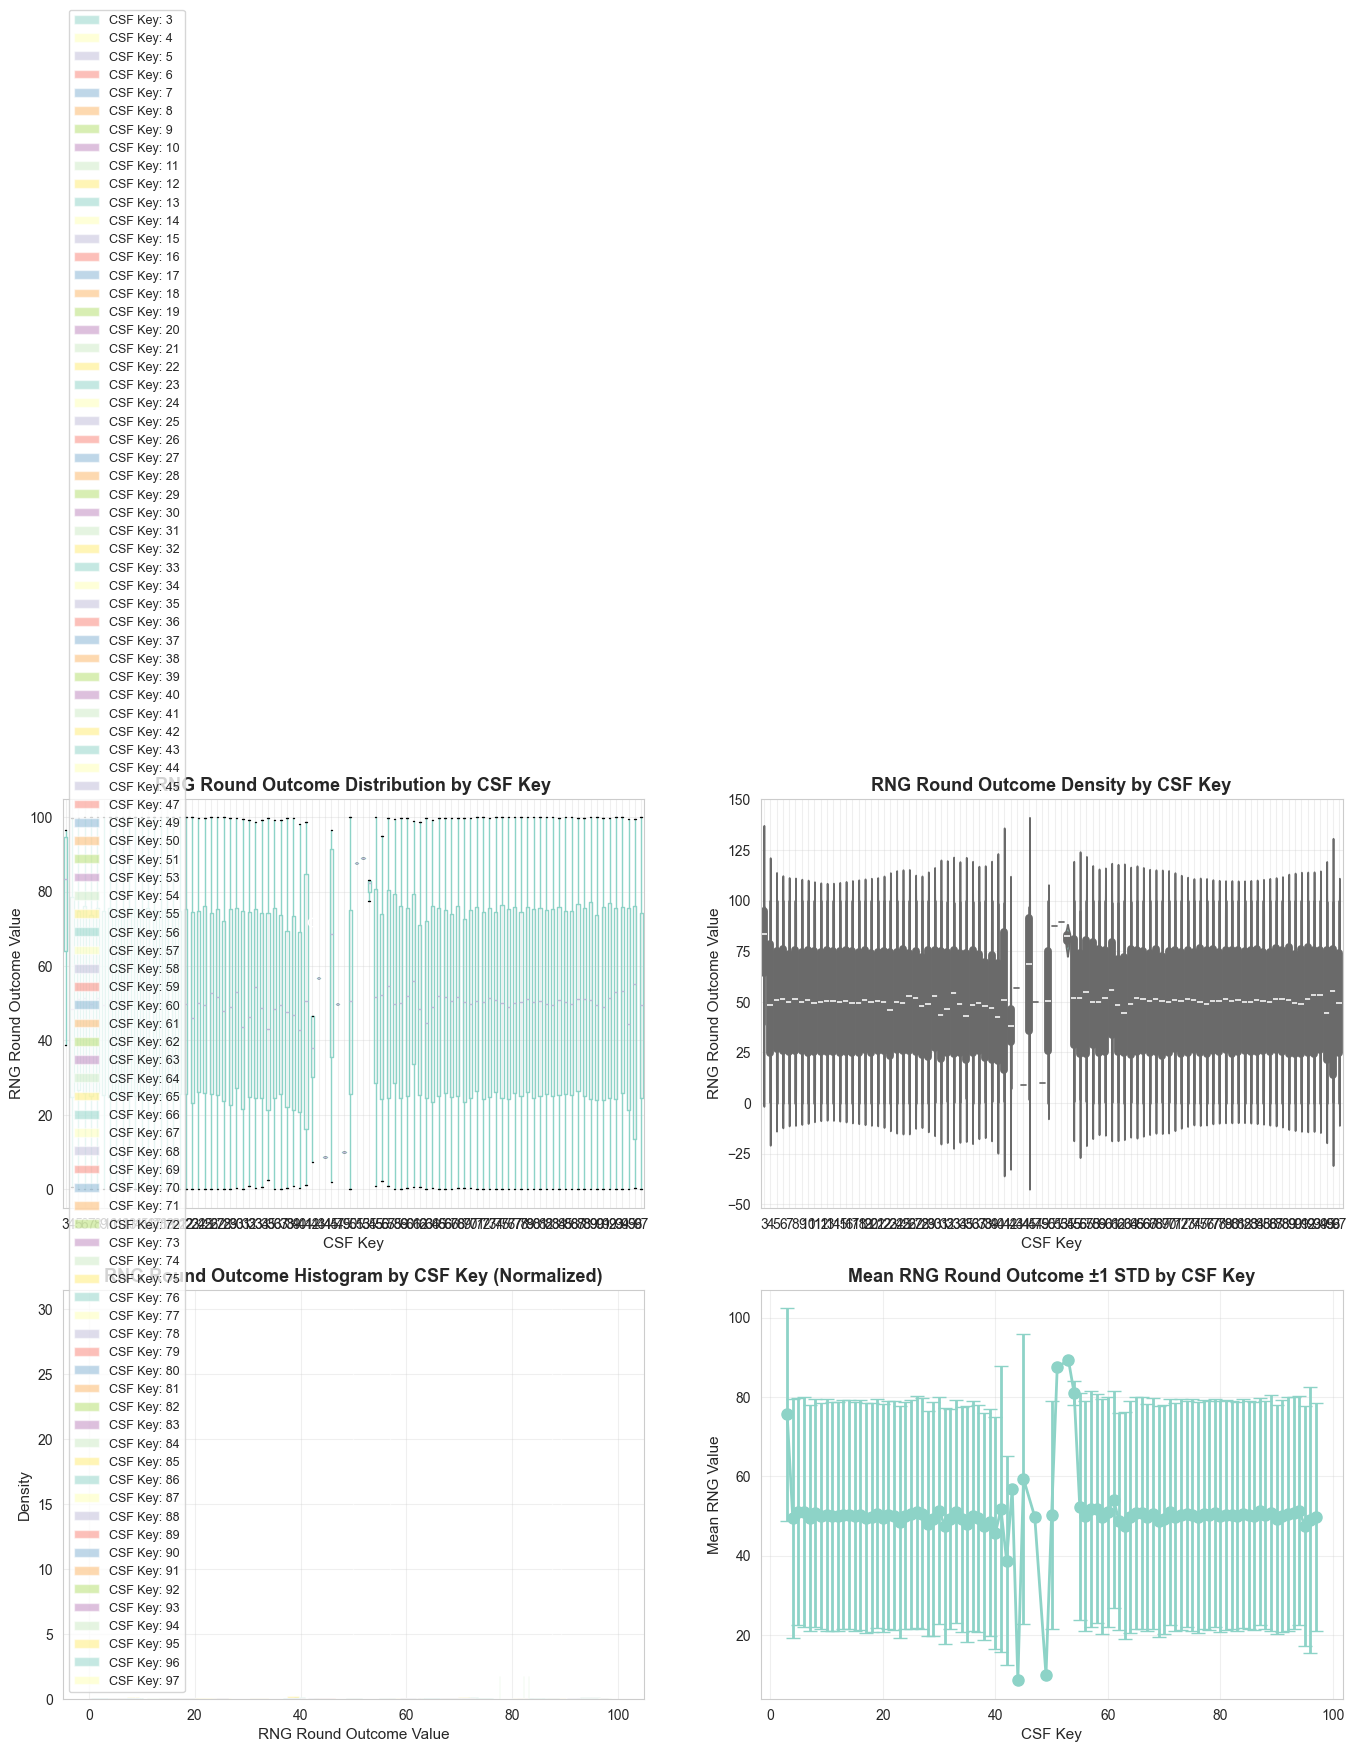

In [7]:
# Visualization: RNG Round Outcome by CSF Key
if df_rng is not None and 'csf_key' in df_rng.columns and 'rng_round_outcome' in df_rng.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Box plot of RNG round outcome by CSF key
    ax1 = axes[0, 0]
    df_rng.boxplot(column='rng_round_outcome', by='csf_key', ax=ax1)
    ax1.set_title('RNG Round Outcome Distribution by CSF Key', fontsize=13, fontweight='bold')
    ax1.set_xlabel('CSF Key', fontsize=11)
    ax1.set_ylabel('RNG Round Outcome Value', fontsize=11)
    ax1.get_figure().suptitle('')  # Remove default title
    ax1.grid(alpha=0.3)
    
    # 2. Violin plot for density visualization
    ax2 = axes[0, 1]
    csf_keys_sorted = sorted(df_rng['csf_key'].unique())
    sns.violinplot(data=df_rng, x='csf_key', y='rng_round_outcome', order=csf_keys_sorted, ax=ax2)
    ax2.set_title('RNG Round Outcome Density by CSF Key', fontsize=13, fontweight='bold')
    ax2.set_xlabel('CSF Key', fontsize=11)
    ax2.set_ylabel('RNG Round Outcome Value', fontsize=11)
    ax2.grid(alpha=0.3)
    
    # 3. Histogram of RNG values colored by CSF key
    ax3 = axes[1, 0]
    for key in csf_keys_sorted:
        data = df_rng[df_rng['csf_key'] == key]['rng_round_outcome']
        ax3.hist(data, bins=30, alpha=0.5, label=f'CSF Key: {key}', density=True)
    ax3.set_title('RNG Round Outcome Histogram by CSF Key (Normalized)', fontsize=13, fontweight='bold')
    ax3.set_xlabel('RNG Round Outcome Value', fontsize=11)
    ax3.set_ylabel('Density', fontsize=11)
    ax3.legend(fontsize=9)
    ax3.grid(alpha=0.3)
    
    # 4. Mean and std by CSF key
    ax4 = axes[1, 1]
    ax4.errorbar(rng_outcome_by_csf['csf_key'], rng_outcome_by_csf['mean'], 
                 yerr=rng_outcome_by_csf['std'], fmt='o-', capsize=5, markersize=8, linewidth=2)
    ax4.set_title('Mean RNG Round Outcome ±1 STD by CSF Key', fontsize=13, fontweight='bold')
    ax4.set_xlabel('CSF Key', fontsize=11)
    ax4.set_ylabel('Mean RNG Value', fontsize=11)
    ax4.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped: Required columns not available.")

### 2. Bomb Plant RNG by Round Outcome & CSF Key

Analyzing rng_bombplant grouped first by outcome_reason_code, then by csf_key.

In [8]:
if df_rng is not None and 'rng_bombplant' in df_rng.columns and 'outcome_reason_code' in df_rng.columns:
    # Group by outcome_reason_code, then by csf_key
    rng_bomb_by_outcome_csf = df_rng.groupby(['outcome_reason_code', 'csf_key'])['rng_bombplant'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('min', 'min'),
        ('q25', lambda x: x.quantile(0.25)),
        ('median', 'median'),
        ('q75', lambda x: x.quantile(0.75)),
        ('max', 'max')
    ]).reset_index()
    
    print("="*80)
    print("RNG BOMB PLANT DISTRIBUTION BY OUTCOME REASON CODE & CSF KEY")
    print("="*80)
    print(rng_bomb_by_outcome_csf.to_string(index=False))
    print("="*80)
    
    # Also check bomb planted flag correlation
    if 'outcome_bomb_planted' in df_rng.columns:
        bomb_plant_rate = df_rng.groupby(['outcome_reason_code', 'csf_key'])['outcome_bomb_planted'].agg([
            ('count', 'count'),
            ('planted_count', 'sum'),
            ('plant_rate', 'mean')
        ]).reset_index()
        print("\nBOMB PLANT RATE BY OUTCOME & CSF KEY")
        print("="*80)
        print(bomb_plant_rate.to_string(index=False))
        print("="*80)
else:
    print("Skipping: Required columns not available.")

RNG BOMB PLANT DISTRIBUTION BY OUTCOME REASON CODE & CSF KEY
 outcome_reason_code  csf_key  count     mean      std      min      q25   median      q75      max
                   2        3      4 0.535317 0.387196 0.048734 0.314128 0.602534 0.823723 0.887467
                   2        4    167 0.513477 0.284046 0.000407 0.290733 0.489563 0.753181 0.993706
                   2        5   1081 0.529063 0.288849 0.000696 0.284313 0.560052 0.780226 0.999499
                   2        6   2128 0.515111 0.288267 0.000386 0.266877 0.525479 0.756746 0.999380
                   2        7   2915 0.496357 0.286378 0.000696 0.252617 0.489688 0.737799 0.999631
                   2        8   3292 0.506269 0.285516 0.000133 0.263702 0.509087 0.755815 0.999983
                   2        9   4015 0.499276 0.293166 0.000238 0.243215 0.495530 0.757694 0.999496
                   2       10   5598 0.494959 0.288758 0.000140 0.245627 0.493552 0.742935 0.999918
                   2       11   8025 0.

C:\Users\peter\AppData\Local\Temp\ipykernel_13892\1558671104.py:56: UserWarning: Tight layout not applied. tight_layout cannot make Axes height small enough to accommodate all Axes decorations.
  plt.tight_layout()


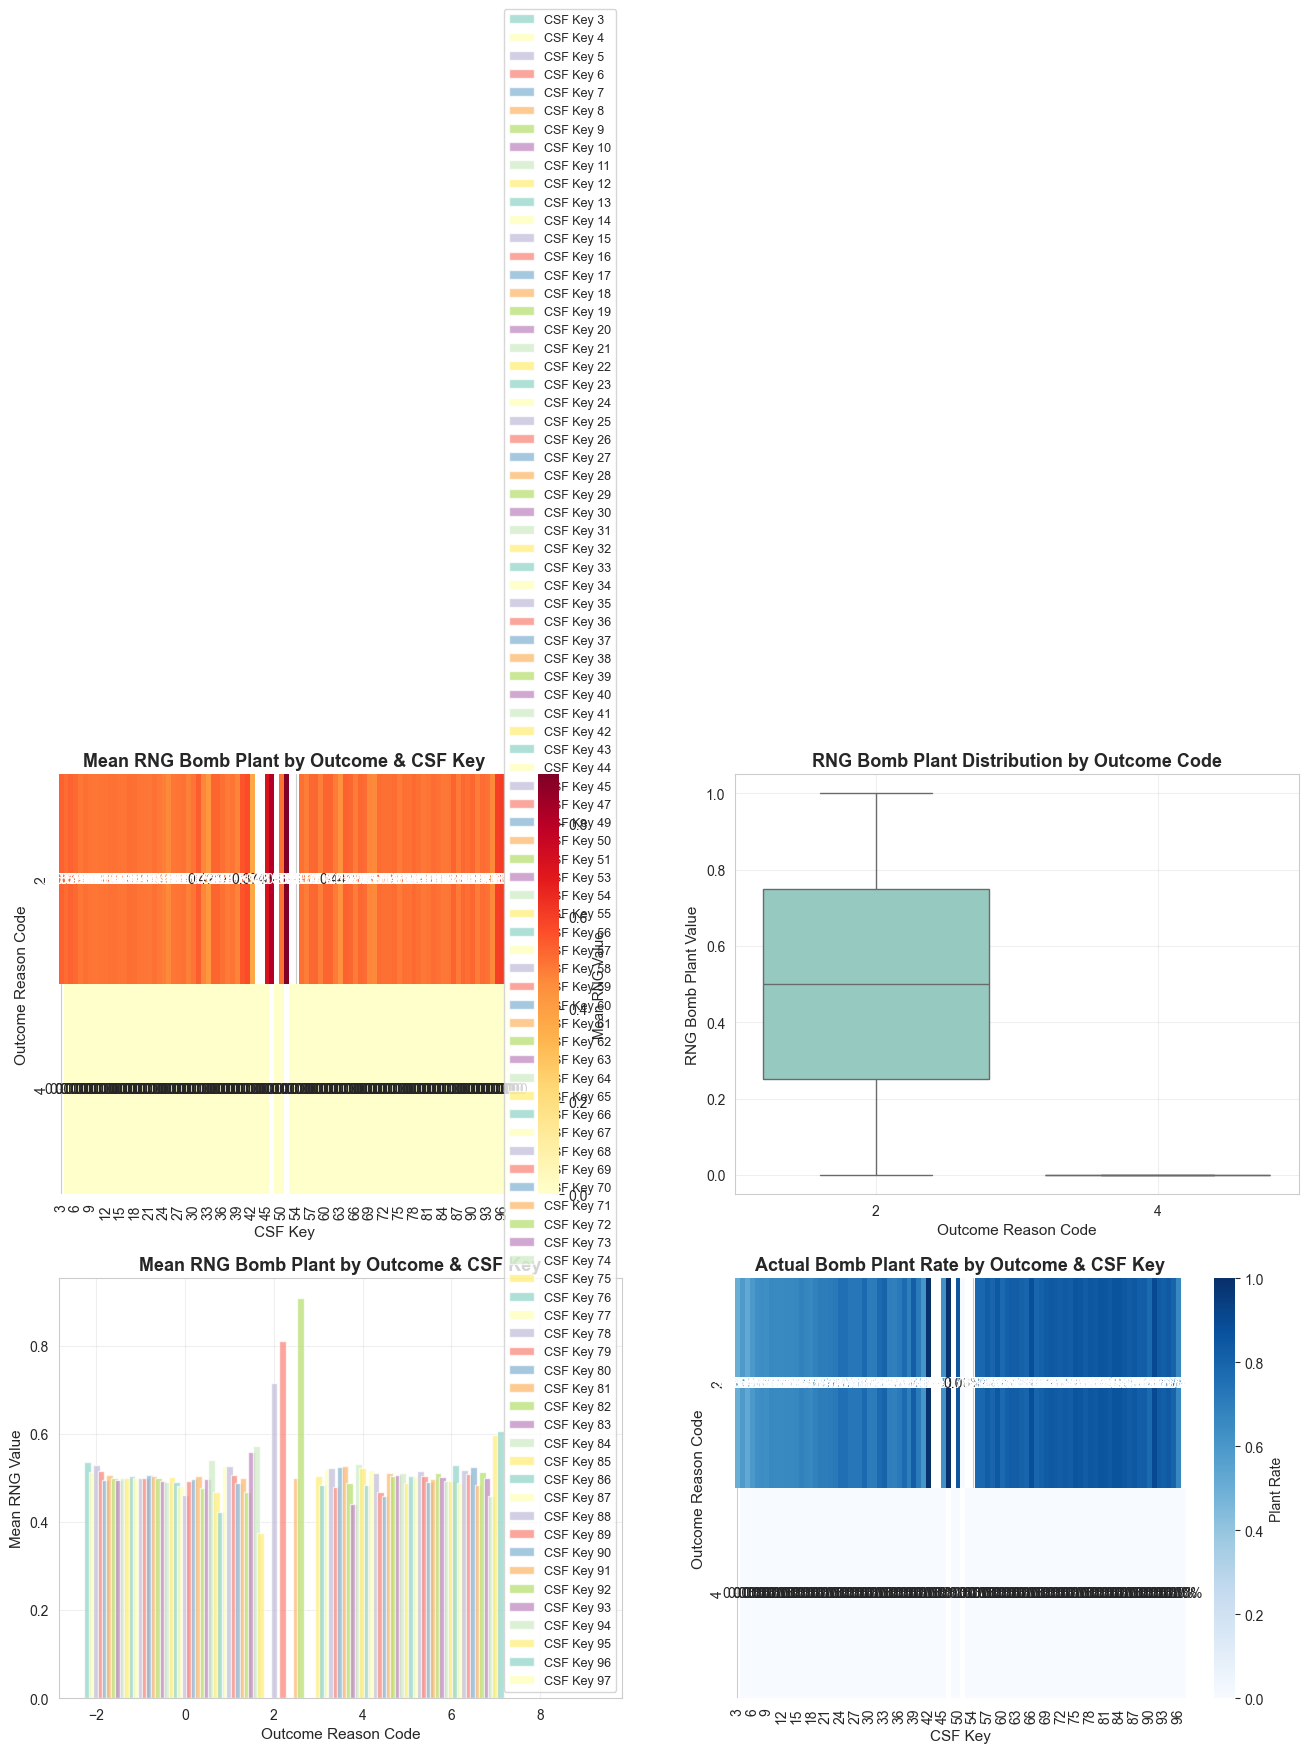

In [9]:
# Visualization: RNG Bomb Plant by Outcome & CSF
if df_rng is not None and 'rng_bombplant' in df_rng.columns and 'outcome_reason_code' in df_rng.columns and 'csf_key' in df_rng.columns:
    # Create pivot for heatmap
    pivot_bomb = rng_bomb_by_outcome_csf.pivot(index='outcome_reason_code', 
                                                 columns='csf_key', 
                                                 values='mean')
    
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Heatmap of mean RNG bomb plant
    ax1 = axes[0, 0]
    sns.heatmap(pivot_bomb, annot=True, fmt='.4f', cmap='YlOrRd', ax=ax1, cbar_kws={'label': 'Mean RNG Value'})
    ax1.set_title('Mean RNG Bomb Plant by Outcome & CSF Key', fontsize=13, fontweight='bold')
    ax1.set_xlabel('CSF Key', fontsize=11)
    ax1.set_ylabel('Outcome Reason Code', fontsize=11)
    
    # 2. Box plot by outcome reason code
    ax2 = axes[0, 1]
    outcome_codes = sorted(df_rng['outcome_reason_code'].unique())
    sns.boxplot(data=df_rng, x='outcome_reason_code', y='rng_bombplant', ax=ax2)
    ax2.set_title('RNG Bomb Plant Distribution by Outcome Code', fontsize=13, fontweight='bold')
    ax2.set_xlabel('Outcome Reason Code', fontsize=11)
    ax2.set_ylabel('RNG Bomb Plant Value', fontsize=11)
    ax2.grid(alpha=0.3)
    
    # 3. Grouped bar plot: mean RNG by outcome and CSF
    ax3 = axes[1, 0]
    for csf_key in sorted(df_rng['csf_key'].unique()):
        subset = rng_bomb_by_outcome_csf[rng_bomb_by_outcome_csf['csf_key'] == csf_key]
        offset = (csf_key - df_rng['csf_key'].mean()) * 0.1  # Small offset for visibility
        ax3.bar(subset['outcome_reason_code'] + offset, subset['mean'], 
                width=0.15, label=f'CSF Key {csf_key}', alpha=0.7)
    ax3.set_title('Mean RNG Bomb Plant by Outcome & CSF Key', fontsize=13, fontweight='bold')
    ax3.set_xlabel('Outcome Reason Code', fontsize=11)
    ax3.set_ylabel('Mean RNG Value', fontsize=11)
    ax3.legend(fontsize=9)
    ax3.grid(alpha=0.3)
    
    # 4. Actual bomb plant rate if available
    ax4 = axes[1, 1]
    if 'outcome_bomb_planted' in df_rng.columns:
        pivot_plant_rate = bomb_plant_rate.pivot(index='outcome_reason_code', 
                                                   columns='csf_key', 
                                                   values='plant_rate')
        sns.heatmap(pivot_plant_rate, annot=True, fmt='.2%', cmap='Blues', ax=ax4, 
                    cbar_kws={'label': 'Plant Rate'})
        ax4.set_title('Actual Bomb Plant Rate by Outcome & CSF Key', fontsize=13, fontweight='bold')
        ax4.set_xlabel('CSF Key', fontsize=11)
        ax4.set_ylabel('Outcome Reason Code', fontsize=11)
    else:
        ax4.text(0.5, 0.5, 'Bomb planted data not available\nin this export mode', 
                ha='center', va='center', fontsize=12, transform=ax4.transAxes)
        ax4.set_title('Bomb Plant Rate (Not Available)', fontsize=13)
        ax4.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped: Required columns not available.")

### 3. Survivors RNG by Round Outcome & CSF Key

Analyzing rng_survivors_ct and rng_survivors_t grouped by outcome_reason_code and csf_key.

In [10]:
if df_rng is not None and 'rng_survivors_ct' in df_rng.columns and 'rng_survivors_t' in df_rng.columns:
    # CT Survivors RNG
    rng_surv_ct_by_outcome_csf = df_rng.groupby(['outcome_reason_code', 'csf_key'])['rng_survivors_ct'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).reset_index()
    
    # T Survivors RNG
    rng_surv_t_by_outcome_csf = df_rng.groupby(['outcome_reason_code', 'csf_key'])['rng_survivors_t'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).reset_index()
    
    print("="*80)
    print("RNG CT SURVIVORS DISTRIBUTION BY OUTCOME & CSF KEY")
    print("="*80)
    print(rng_surv_ct_by_outcome_csf.to_string(index=False))
    print("\n" + "="*80)
    print("RNG T SURVIVORS DISTRIBUTION BY OUTCOME & CSF KEY")
    print("="*80)
    print(rng_surv_t_by_outcome_csf.to_string(index=False))
    print("="*80)
    
    # Actual survivor counts if available
    if 'outcome_ct_survivors' in df_rng.columns and 'outcome_t_survivors' in df_rng.columns:
        actual_survivors = df_rng.groupby(['outcome_reason_code', 'csf_key']).agg({
            'outcome_ct_survivors': ['mean', 'std'],
            'outcome_t_survivors': ['mean', 'std']
        }).reset_index()
        print("\nACTUAL SURVIVOR COUNTS BY OUTCOME & CSF KEY")
        print("="*80)
        print(actual_survivors.to_string(index=False))
        print("="*80)
else:
    print("Skipping: Required columns not available.")

RNG CT SURVIVORS DISTRIBUTION BY OUTCOME & CSF KEY
 outcome_reason_code  csf_key  count      mean       std    median
                   2        3      4 48.242251 28.844066 57.289829
                   2        4    167 50.732572 28.937704 50.888178
                   2        5   1081 50.909961 28.338344 51.919813
                   2        6   2128 49.870010 28.531330 49.631486
                   2        7   2915 49.187863 28.802841 48.628321
                   2        8   3292 50.276878 29.109640 50.836025
                   2        9   4015 50.522435 29.214698 50.580990
                   2       10   5598 50.150380 28.861159 49.436627
                   2       11   8025 49.779153 28.718637 50.230722
                   2       12  10470 50.370691 28.729746 50.261954
                   2       13  11977 50.661205 28.790006 51.545427
                   2       14  11206 49.845648 28.644098 49.940372
                   2       15   9304 50.031787 29.165943 49.946528
           

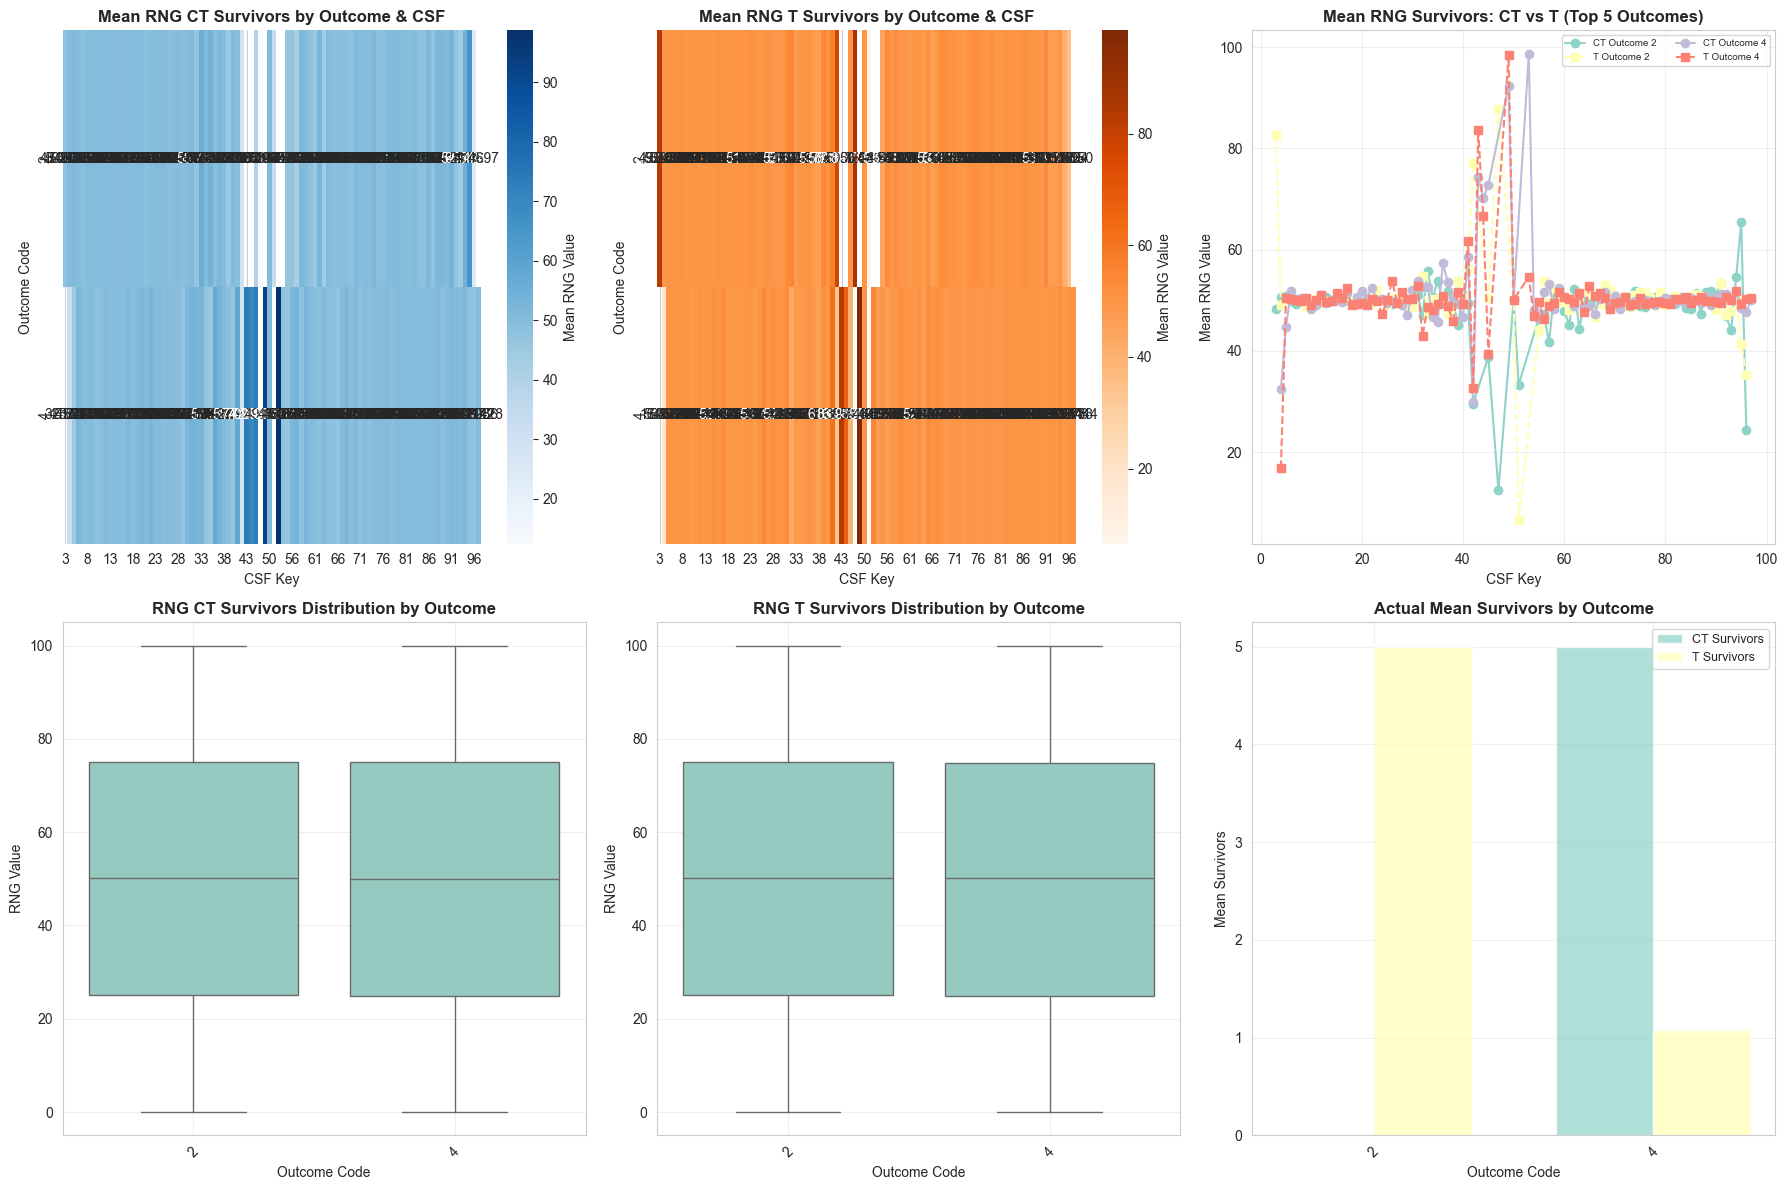

In [11]:
# Visualization: RNG Survivors by Outcome & CSF
if df_rng is not None and 'rng_survivors_ct' in df_rng.columns and 'rng_survivors_t' in df_rng.columns and 'csf_key' in df_rng.columns:
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    
    # 1. CT Survivors RNG Heatmap
    ax1 = axes[0, 0]
    pivot_ct = rng_surv_ct_by_outcome_csf.pivot(index='outcome_reason_code', 
                                                  columns='csf_key', 
                                                  values='mean')
    sns.heatmap(pivot_ct, annot=True, fmt='.4f', cmap='Blues', ax=ax1, 
                cbar_kws={'label': 'Mean RNG Value'})
    ax1.set_title('Mean RNG CT Survivors by Outcome & CSF', fontsize=12, fontweight='bold')
    ax1.set_xlabel('CSF Key', fontsize=10)
    ax1.set_ylabel('Outcome Code', fontsize=10)
    
    # 2. T Survivors RNG Heatmap
    ax2 = axes[0, 1]
    pivot_t = rng_surv_t_by_outcome_csf.pivot(index='outcome_reason_code', 
                                                columns='csf_key', 
                                                values='mean')
    sns.heatmap(pivot_t, annot=True, fmt='.4f', cmap='Oranges', ax=ax2, 
                cbar_kws={'label': 'Mean RNG Value'})
    ax2.set_title('Mean RNG T Survivors by Outcome & CSF', fontsize=12, fontweight='bold')
    ax2.set_xlabel('CSF Key', fontsize=10)
    ax2.set_ylabel('Outcome Code', fontsize=10)
    
    # 3. Comparison plot
    ax3 = axes[0, 2]
    for outcome in sorted(df_rng['outcome_reason_code'].unique())[:5]:  # Top 5 outcomes
        subset_ct = rng_surv_ct_by_outcome_csf[rng_surv_ct_by_outcome_csf['outcome_reason_code'] == outcome]
        subset_t = rng_surv_t_by_outcome_csf[rng_surv_t_by_outcome_csf['outcome_reason_code'] == outcome]
        ax3.plot(subset_ct['csf_key'], subset_ct['mean'], marker='o', label=f'CT Outcome {outcome}', linestyle='-')
        ax3.plot(subset_t['csf_key'], subset_t['mean'], marker='s', label=f'T Outcome {outcome}', linestyle='--')
    ax3.set_title('Mean RNG Survivors: CT vs T (Top 5 Outcomes)', fontsize=12, fontweight='bold')
    ax3.set_xlabel('CSF Key', fontsize=10)
    ax3.set_ylabel('Mean RNG Value', fontsize=10)
    ax3.legend(fontsize=7, ncol=2)
    ax3.grid(alpha=0.3)
    
    # 4. Box plot CT survivors RNG by outcome
    ax4 = axes[1, 0]
    sns.boxplot(data=df_rng, x='outcome_reason_code', y='rng_survivors_ct', ax=ax4)
    ax4.set_title('RNG CT Survivors Distribution by Outcome', fontsize=12, fontweight='bold')
    ax4.set_xlabel('Outcome Code', fontsize=10)
    ax4.set_ylabel('RNG Value', fontsize=10)
    ax4.tick_params(axis='x', rotation=45)
    ax4.grid(alpha=0.3)
    
    # 5. Box plot T survivors RNG by outcome
    ax5 = axes[1, 1]
    sns.boxplot(data=df_rng, x='outcome_reason_code', y='rng_survivors_t', ax=ax5)
    ax5.set_title('RNG T Survivors Distribution by Outcome', fontsize=12, fontweight='bold')
    ax5.set_xlabel('Outcome Code', fontsize=10)
    ax5.set_ylabel('RNG Value', fontsize=10)
    ax5.tick_params(axis='x', rotation=45)
    ax5.grid(alpha=0.3)
    
    # 6. Actual survivors if available
    ax6 = axes[1, 2]
    if 'outcome_ct_survivors' in df_rng.columns and 'outcome_t_survivors' in df_rng.columns:
        outcome_surv_means = df_rng.groupby('outcome_reason_code').agg({
            'outcome_ct_survivors': 'mean',
            'outcome_t_survivors': 'mean'
        }).reset_index()
        x = np.arange(len(outcome_surv_means))
        width = 0.35
        ax6.bar(x - width/2, outcome_surv_means['outcome_ct_survivors'], width, label='CT Survivors', alpha=0.7)
        ax6.bar(x + width/2, outcome_surv_means['outcome_t_survivors'], width, label='T Survivors', alpha=0.7)
        ax6.set_xlabel('Outcome Code', fontsize=10)
        ax6.set_ylabel('Mean Survivors', fontsize=10)
        ax6.set_title('Actual Mean Survivors by Outcome', fontsize=12, fontweight='bold')
        ax6.set_xticks(x)
        ax6.set_xticklabels(outcome_surv_means['outcome_reason_code'], rotation=45)
        ax6.legend(fontsize=9)
        ax6.grid(alpha=0.3)
    else:
        ax6.text(0.5, 0.5, 'Actual survivor data\nnot available', 
                ha='center', va='center', fontsize=11, transform=ax6.transAxes)
        ax6.axis('off')
    
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped: Required columns not available.")

### 4. CSF RNG Analysis

Analyzing the rng_csf values and their relationship to the calculated CSF and CSF keys.

In [12]:
if df_rng is not None and 'rng_csf' in df_rng.columns and 'csf' in df_rng.columns and 'csf_key' in df_rng.columns:
    # Distribution of RNG CSF
    print("="*80)
    print("RNG CSF OVERALL DISTRIBUTION")
    print("="*80)
    print(f"Count: {df_rng['rng_csf'].count()}")
    print(f"Mean: {df_rng['rng_csf'].mean():.6f}")
    print(f"Std: {df_rng['rng_csf'].std():.6f}")
    print(f"Min: {df_rng['rng_csf'].min():.6f}")
    print(f"25%: {df_rng['rng_csf'].quantile(0.25):.6f}")
    print(f"Median: {df_rng['rng_csf'].median():.6f}")
    print(f"75%: {df_rng['rng_csf'].quantile(0.75):.6f}")
    print(f"Max: {df_rng['rng_csf'].max():.6f}")
    print("="*80)
    
    # RNG CSF by CSF Key
    rng_csf_by_key = df_rng.groupby('csf_key')['rng_csf'].agg([
        ('count', 'count'),
        ('mean', 'mean'),
        ('std', 'std'),
        ('median', 'median')
    ]).reset_index()
    
    print("\nRNG CSF DISTRIBUTION BY CSF KEY")
    print("="*80)
    print(rng_csf_by_key.to_string(index=False))
    print("="*80)
    
    # Correlation between RNG CSF and actual CSF
    correlation = df_rng[['rng_csf', 'csf']].corr()
    print(f"\nCorrelation between rng_csf and csf: {correlation.iloc[0,1]:.6f}")
    print("="*80)
else:
    print("Skipping: Required columns not available.")

RNG CSF OVERALL DISTRIBUTION
Count: 249339
Mean: 0.499515
Std: 0.288996
Min: 0.000008
25%: 0.249308
Median: 0.499544
75%: 0.750247
Max: 0.999986

RNG CSF DISTRIBUTION BY CSF KEY
 csf_key  count     mean      std   median
       3      4 0.224245 0.119444 0.205482
       4    170 0.535681 0.274633 0.542282
       5   1138 0.492192 0.292853 0.483886
       6   2275 0.496402 0.290889 0.499972
       7   3120 0.505657 0.289837 0.509340
       8   3583 0.500587 0.293229 0.497054
       9   4414 0.500758 0.288940 0.505439
      10   6204 0.504539 0.287282 0.507200
      11   9084 0.497081 0.289784 0.496893
      12  11857 0.499040 0.287011 0.502944
      13  13811 0.499039 0.289685 0.500166
      14  13095 0.498763 0.291187 0.498485
      15  10934 0.499131 0.289237 0.498226
      16   8532 0.496817 0.290723 0.493848
      17   6759 0.499903 0.288824 0.493219
      18   5367 0.496793 0.290765 0.495817
      19   4413 0.500351 0.288528 0.505998
      20   3683 0.495236 0.288222 0.496873
     

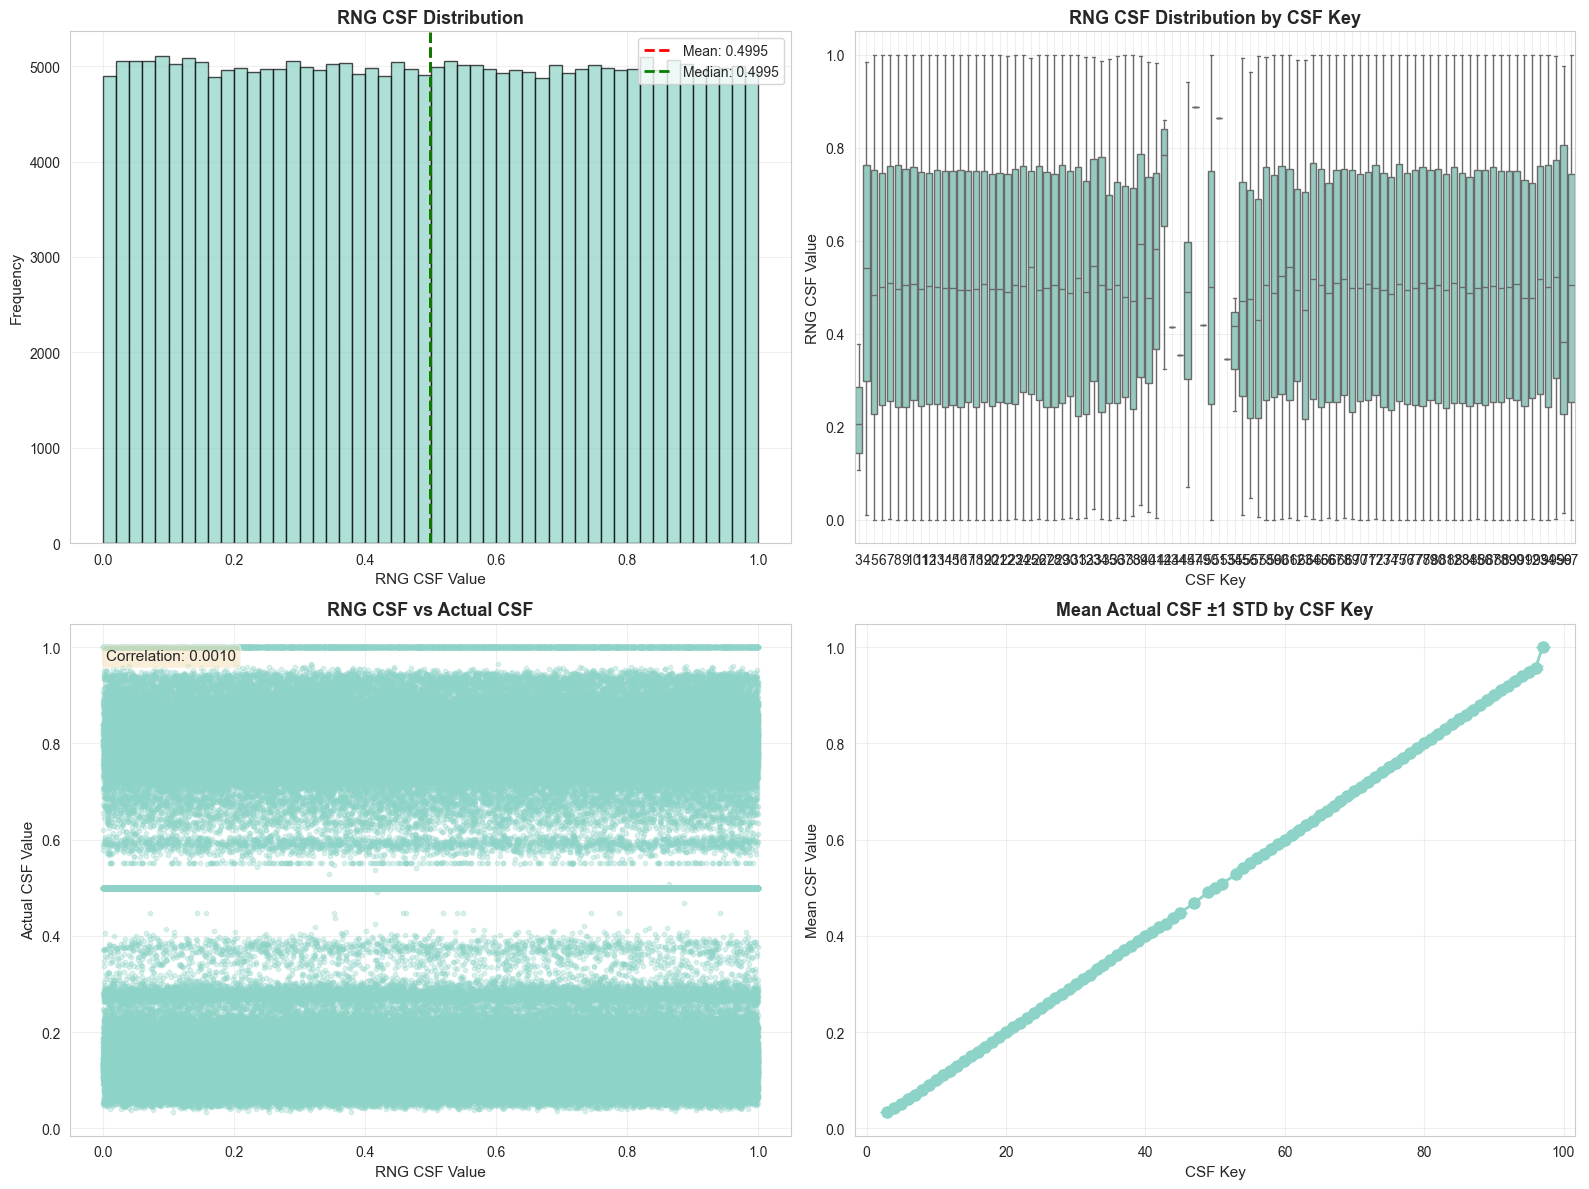

In [13]:
# Visualization: CSF RNG Analysis
if df_rng is not None and 'rng_csf' in df_rng.columns and 'csf' in df_rng.columns:
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # 1. Histogram of RNG CSF
    ax1 = axes[0, 0]
    ax1.hist(df_rng['rng_csf'], bins=50, alpha=0.7, edgecolor='black')
    ax1.axvline(df_rng['rng_csf'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df_rng["rng_csf"].mean():.4f}')
    ax1.axvline(df_rng['rng_csf'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df_rng["rng_csf"].median():.4f}')
    ax1.set_title('RNG CSF Distribution', fontsize=13, fontweight='bold')
    ax1.set_xlabel('RNG CSF Value', fontsize=11)
    ax1.set_ylabel('Frequency', fontsize=11)
    ax1.legend(fontsize=10)
    ax1.grid(alpha=0.3)
    
    # 2. Box plot by CSF key
    ax2 = axes[0, 1]
    if 'csf_key' in df_rng.columns:
        sns.boxplot(data=df_rng, x='csf_key', y='rng_csf', ax=ax2)
        ax2.set_title('RNG CSF Distribution by CSF Key', fontsize=13, fontweight='bold')
        ax2.set_xlabel('CSF Key', fontsize=11)
        ax2.set_ylabel('RNG CSF Value', fontsize=11)
        ax2.grid(alpha=0.3)
    
    # 3. Scatter plot: RNG CSF vs Actual CSF
    ax3 = axes[1, 0]
    ax3.scatter(df_rng['rng_csf'], df_rng['csf'], alpha=0.3, s=10)
    ax3.set_title('RNG CSF vs Actual CSF', fontsize=13, fontweight='bold')
    ax3.set_xlabel('RNG CSF Value', fontsize=11)
    ax3.set_ylabel('Actual CSF Value', fontsize=11)
    ax3.grid(alpha=0.3)
    
    # Add correlation text
    if len(df_rng) > 1:
        corr = df_rng[['rng_csf', 'csf']].corr().iloc[0,1]
        ax3.text(0.05, 0.95, f'Correlation: {corr:.4f}', 
                transform=ax3.transAxes, fontsize=11, verticalalignment='top',
                bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
    
    # 4. CSF by CSF Key (actual values)
    ax4 = axes[1, 1]
    if 'csf_key' in df_rng.columns:
        csf_stats = df_rng.groupby('csf_key')['csf'].agg(['mean', 'std']).reset_index()
        ax4.errorbar(csf_stats['csf_key'], csf_stats['mean'], yerr=csf_stats['std'], 
                    fmt='o-', capsize=5, markersize=8, linewidth=2)
        ax4.set_title('Mean Actual CSF ±1 STD by CSF Key', fontsize=13, fontweight='bold')
        ax4.set_xlabel('CSF Key', fontsize=11)
        ax4.set_ylabel('Mean CSF Value', fontsize=11)
        ax4.grid(alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("Visualization skipped: Required columns not available.")

### 5. Comprehensive RNG Correlation Matrix

Analyzing correlations between all RNG values and their corresponding outcome variables.

CORRELATION MATRIX: RNG VALUES & OUTCOMES
                       rng_csf  rng_round_outcome  rng_bombplant  rng_survivors_ct  rng_survivors_t       csf  outcome_reason_code  outcome_ct_wins  outcome_bomb_planted  outcome_ct_survivors  outcome_t_survivors
rng_csf               1.000000           0.001266       0.386735          0.000585        -0.000501  0.000987            -0.508420        -0.508420              0.400399             -0.508420             0.500622
rng_round_outcome     0.001266           1.000000       0.001702          0.001289        -0.000125  0.002662            -0.001141        -0.001141              0.000256             -0.001141             0.001513
rng_bombplant         0.386735           0.001702       1.000000          0.002125         0.002380 -0.484839            -0.758824        -0.758824              0.201562             -0.758824             0.731600
rng_survivors_ct      0.000585           0.001289       0.002125          1.000000        -0.001250 -0.001

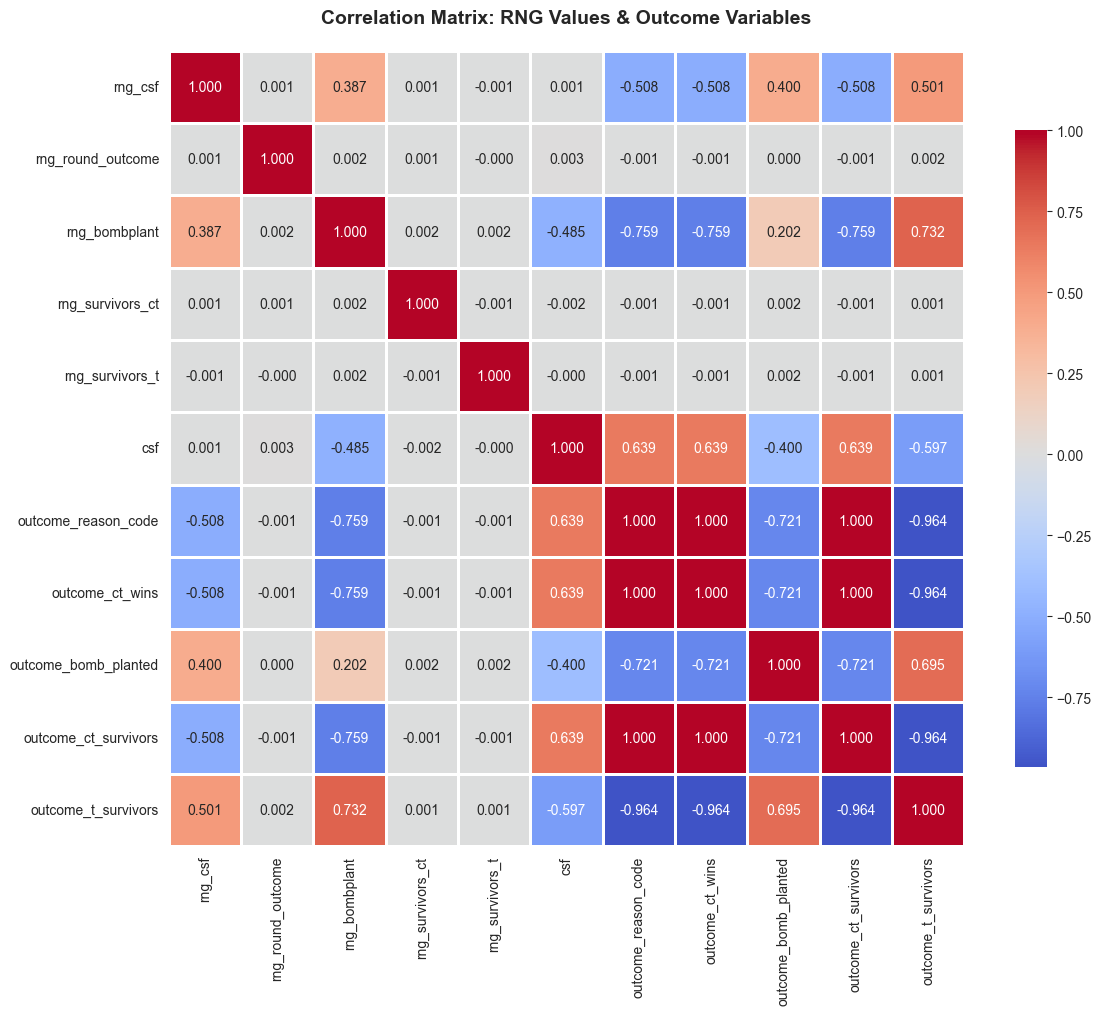

In [14]:
if df_rng is not None:
    # Select RNG and outcome columns for correlation
    corr_cols = []
    
    # Add RNG columns
    if 'rng_csf' in df_rng.columns:
        corr_cols.append('rng_csf')
    if 'rng_round_outcome' in df_rng.columns:
        corr_cols.append('rng_round_outcome')
    if 'rng_bombplant' in df_rng.columns:
        corr_cols.append('rng_bombplant')
    if 'rng_survivors_ct' in df_rng.columns:
        corr_cols.append('rng_survivors_ct')
    if 'rng_survivors_t' in df_rng.columns:
        corr_cols.append('rng_survivors_t')
    
    # Add outcome columns
    if 'csf' in df_rng.columns:
        corr_cols.append('csf')
    if 'outcome_reason_code' in df_rng.columns:
        corr_cols.append('outcome_reason_code')
    if 'outcome_ct_wins' in df_rng.columns:
        corr_cols.append('outcome_ct_wins')
    if 'outcome_bomb_planted' in df_rng.columns:
        corr_cols.append('outcome_bomb_planted')
    if 'outcome_ct_survivors' in df_rng.columns:
        corr_cols.append('outcome_ct_survivors')
    if 'outcome_t_survivors' in df_rng.columns:
        corr_cols.append('outcome_t_survivors')
    
    if len(corr_cols) > 1:
        # Calculate correlation matrix
        corr_matrix = df_rng[corr_cols].corr()
        
        print("="*80)
        print("CORRELATION MATRIX: RNG VALUES & OUTCOMES")
        print("="*80)
        print(corr_matrix.to_string())
        print("="*80)
        
        # Visualize correlation matrix
        plt.figure(figsize=(12, 10))
        sns.heatmap(corr_matrix, annot=True, fmt='.3f', cmap='coolwarm', center=0,
                    square=True, linewidths=1, cbar_kws={"shrink": 0.8})
        plt.title('Correlation Matrix: RNG Values & Outcome Variables', fontsize=14, fontweight='bold', pad=20)
        plt.tight_layout()
        plt.show()
    else:
        print("Not enough columns available for correlation analysis.")
else:
    print("Skipping: RNG dataframe not available.")

### 6. RNG Distribution Summary Statistics

Comprehensive statistical summary of all RNG values.

RNG VALUES SUMMARY STATISTICS
             rng_csf  rng_round_outcome  rng_bombplant  rng_survivors_ct  rng_survivors_t
count  249339.000000      249339.000000  249339.000000     249339.000000    249339.000000
mean        0.499515          50.149353       0.275043         50.027282        50.009652
std         0.288996          28.867178       0.328321         28.865956        28.879511
min         0.000008           0.000907       0.000000          0.000088         0.000127
25%         0.249308          25.157493       0.000000         25.022383        24.923672
50%         0.499544          50.232115       0.089812         50.046242        50.155053
75%         0.750247          75.237847       0.545980         75.046857        74.962175
max         0.999986          99.999006       0.999998         99.999991        99.999617

UNIFORMITY TEST (Expected: mean≈0.5, std≈0.289)
rng_csf                   | Mean: 0.499515 | Std: 0.288996
rng_round_outcome         | Mean: 50.149353 | Std: 2

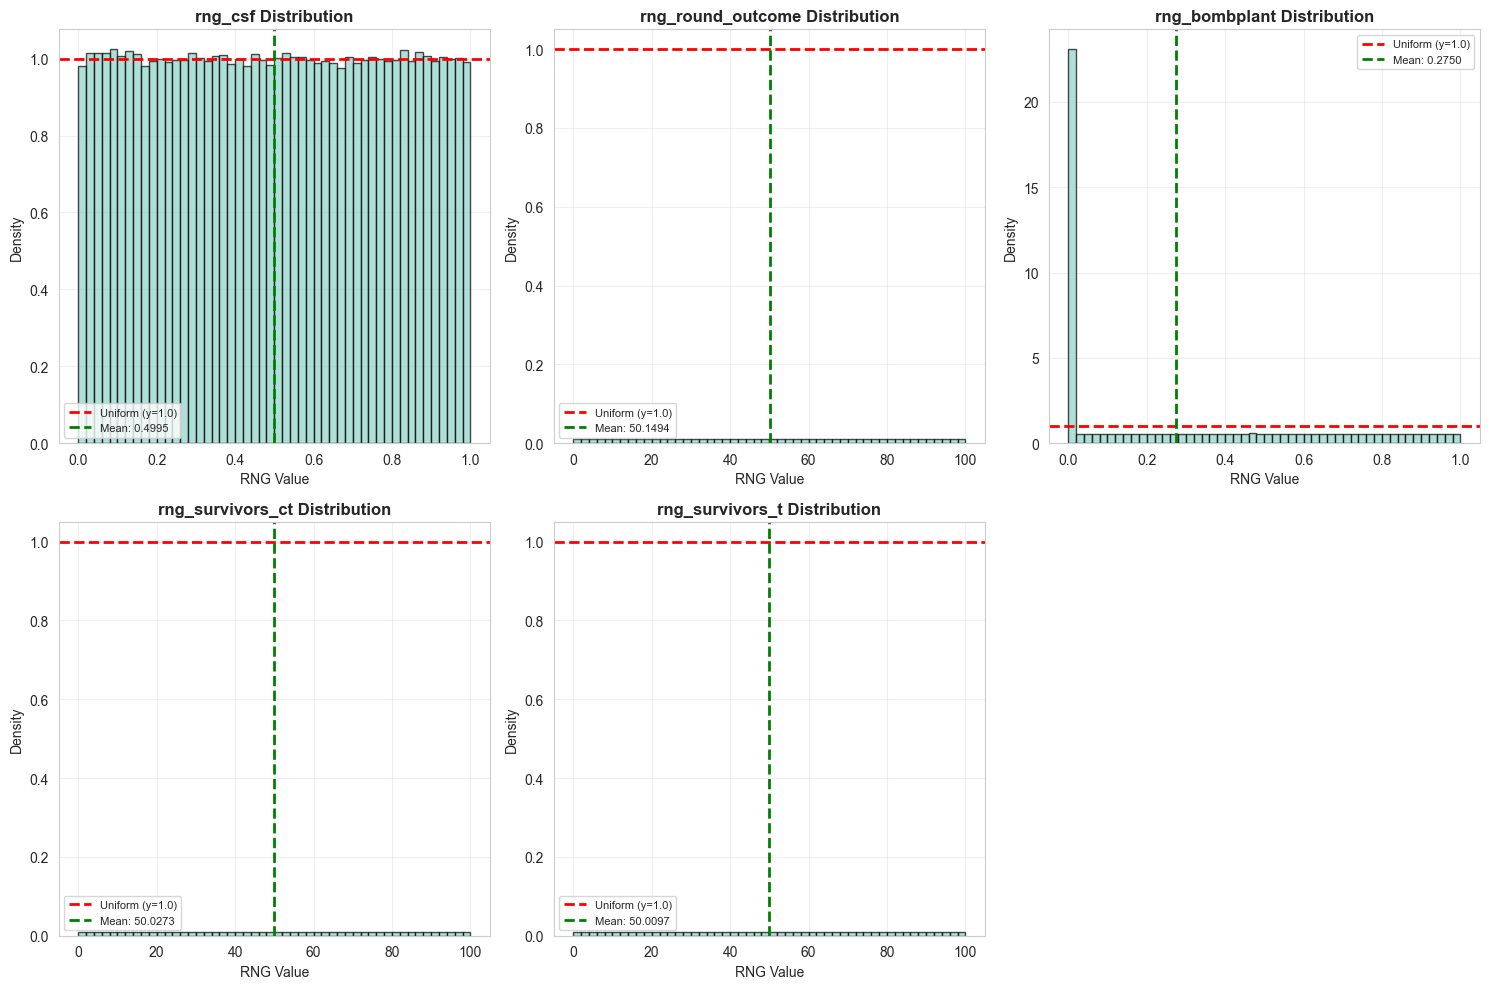

In [15]:
if df_rng is not None:
    rng_columns = [col for col in df_rng.columns if col.startswith('rng_')]
    
    if len(rng_columns) > 0:
        print("="*80)
        print("RNG VALUES SUMMARY STATISTICS")
        print("="*80)
        rng_summary = df_rng[rng_columns].describe()
        print(rng_summary.to_string())
        print("="*80)
        
        # Test for uniformity (RNG values should be uniform [0,1])
        print("\nUNIFORMITY TEST (Expected: mean≈0.5, std≈0.289)")
        print("="*80)
        for col in rng_columns:
            mean_val = df_rng[col].mean()
            std_val = df_rng[col].std()
            # Theoretical std for uniform [0,1] is 1/sqrt(12) ≈ 0.289
            print(f"{col:25s} | Mean: {mean_val:.6f} | Std: {std_val:.6f}")
        print("="*80)
        
        # Visualize all RNG distributions
        n_rng = len(rng_columns)
        n_cols = 3
        n_rows = (n_rng + n_cols - 1) // n_cols
        
        fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
        axes = axes.flatten() if n_rng > 1 else [axes]
        
        for idx, col in enumerate(rng_columns):
            ax = axes[idx]
            ax.hist(df_rng[col], bins=50, alpha=0.7, edgecolor='black', density=True)
            ax.axhline(y=1.0, color='red', linestyle='--', linewidth=2, label='Uniform (y=1.0)')
            ax.axvline(df_rng[col].mean(), color='green', linestyle='--', linewidth=2, 
                      label=f'Mean: {df_rng[col].mean():.4f}')
            ax.set_title(f'{col} Distribution', fontsize=12, fontweight='bold')
            ax.set_xlabel('RNG Value', fontsize=10)
            ax.set_ylabel('Density', fontsize=10)
            ax.legend(fontsize=8)
            ax.grid(alpha=0.3)
        
        # Hide unused subplots
        for idx in range(n_rng, len(axes)):
            axes[idx].axis('off')
        
        plt.tight_layout()
        plt.show()
    else:
        print("No RNG columns found.")
else:
    print("Skipping: RNG dataframe not available.")